In [18]:
from google.colab import files
file = files.upload()

Saving train_and_test2.csv to train_and_test2.csv


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns;sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


In [204]:
data= pd.read_csv("train_and_test2.csv")


# selecting our feature columns
feature_columns= ["Age",	"Fare",	"Sex",	"sibsp", "Parch","Pclass","Embarked", "2urvived"]


data= data[feature_columns]


data = data.rename(columns={"2urvived": "Survived"})

data.head()



,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


In [167]:
data.shape

(1309, 8)

In [168]:
# test for missing values

data.isnull().any()

Age         False
Fare        False
Sex         False
sibsp       False
Parch       False
Pclass      False
Embarked     True
2urvived    False
dtype: bool

In [0]:
# replacing nan values in Embarked with its mode

data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

In [201]:
# basic descriptive statistics

data.describe()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.503186,33.281086,0.355997,0.498854,0.385027,2.294882,1.493506,0.261268
std,12.905241,51.741500,0.478997,1.041658,0.865560,0.837836,0.814244,0.439494
min,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,22.000000,7.895800,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,35.000000,31.275000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000
max,80.000000,512.329200,1.000000,8.000000,9.000000,3.000000,2.000000,1.000000


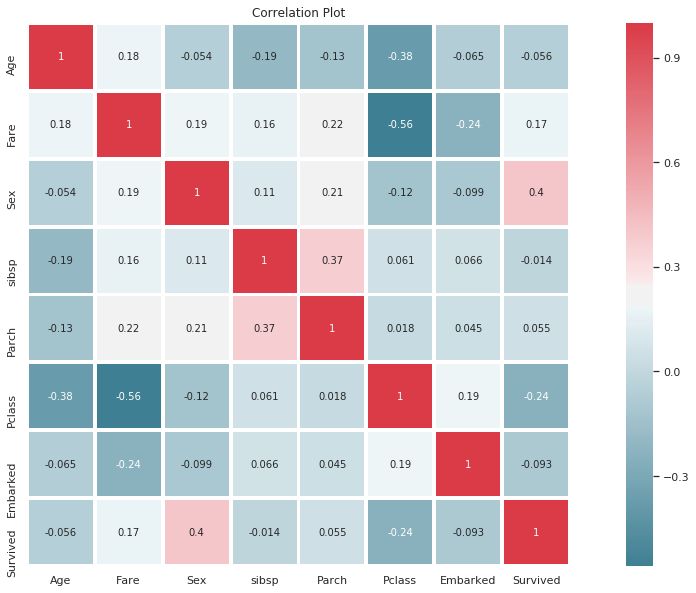

In [205]:
# Heatmap showing correlation between different features

fig, ax =plt.subplots(figsize=(20,10))
plt.title("Correlation Plot")
sns.heatmap(data.corr(), mask=np.zeros_like(data.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True,linewidths=3)
plt.show()

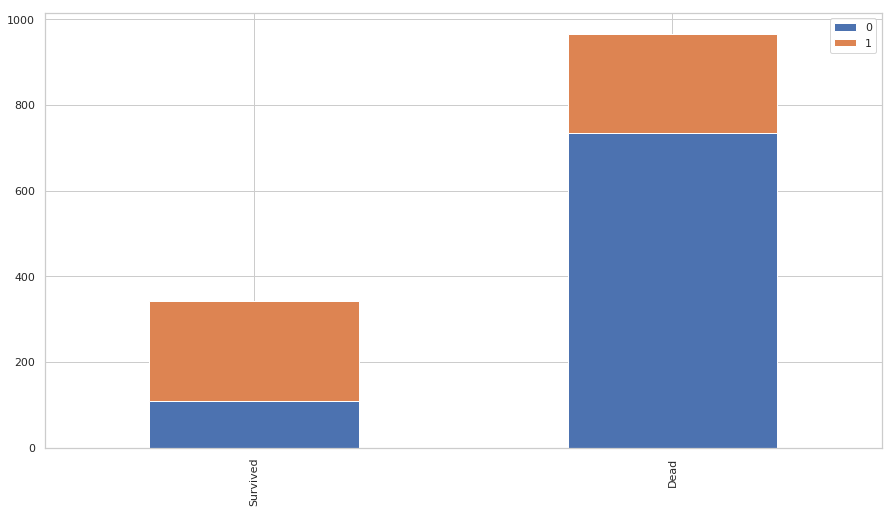

In [209]:
sns.set_style('whitegrid')

survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))


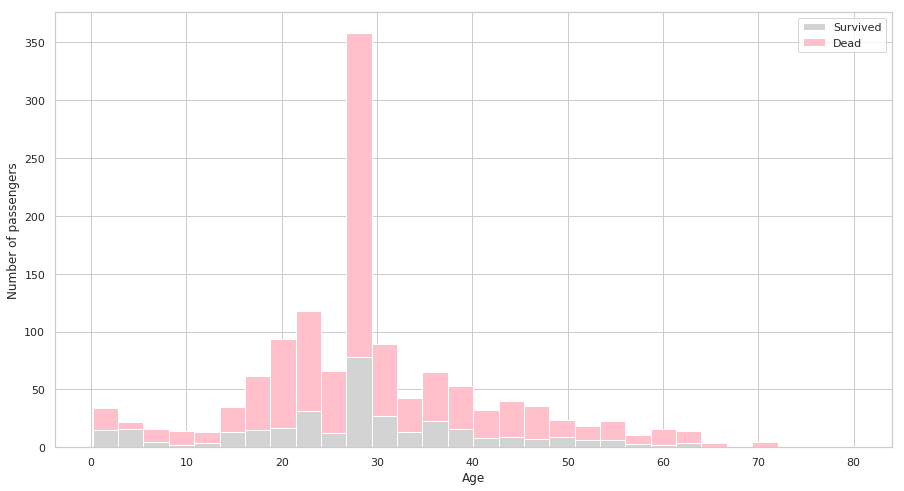

In [211]:
sns.set_style('whitegrid')

figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Age'], data[data['Survived']==0]['Age']], stacked=True, color = ["lightgrey","pink"],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

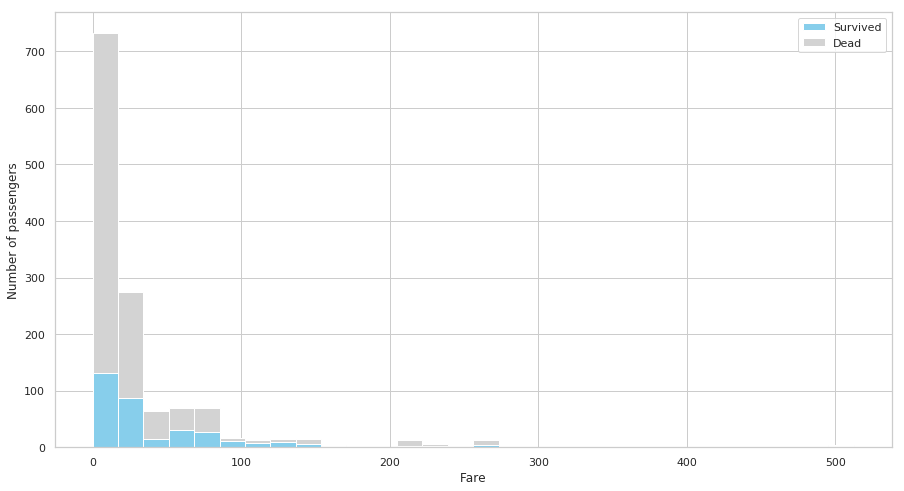

In [213]:


figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']], stacked=True, color = ["skyblue","lightgrey"],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()


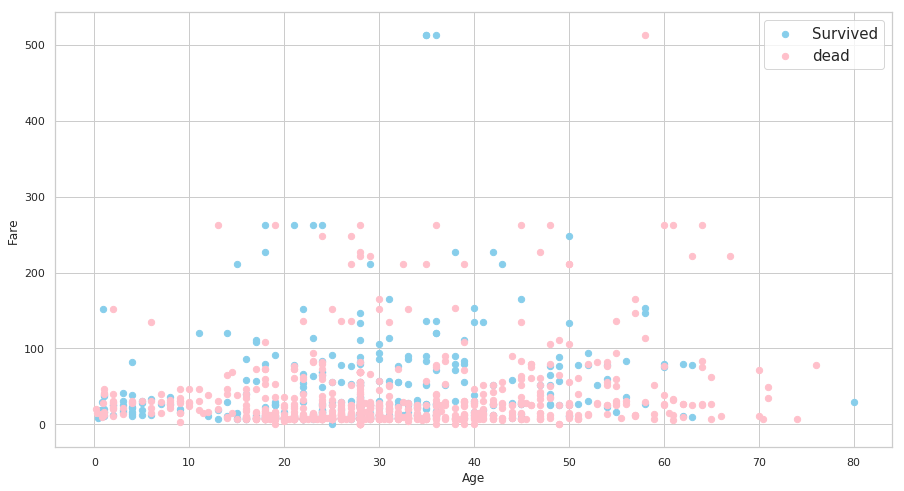

In [214]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Fare'],c='skyblue',s=40)
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],c='pink',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('Survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

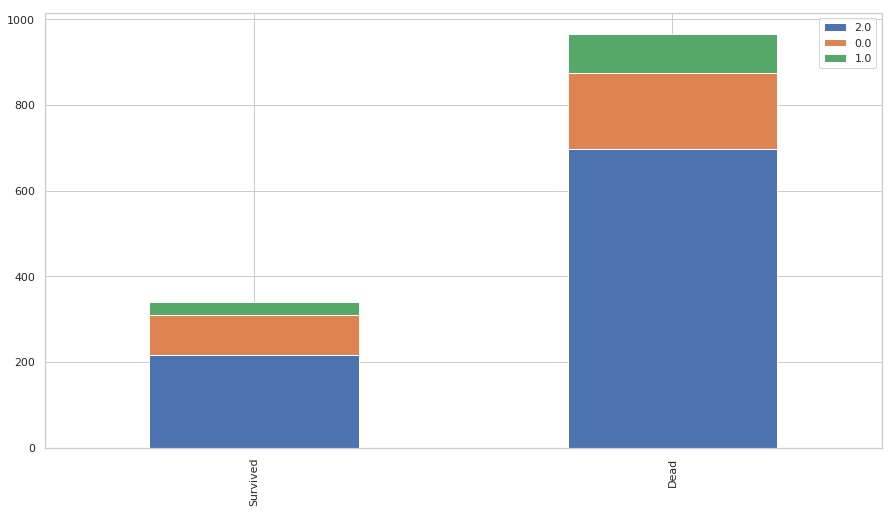

In [222]:
survived_embark = data[data['Survived']==1]['Embarked'].value_counts()
dead_embark = data[data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(15,8))

In [0]:
# Splitting data into test and train datsets, taking 30% of data as testing dataset.

#  data is split in a stratified fashion(e.i. equal distributon), using "Species" as the labels array

X = data.drop("Survived",axis=1)
y = data['Survived']

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30,stratify= y)  



In [0]:
class OneRule(object):
    
    def __init__(self):
        self.ideal_variable = None
        self.max_accuracy = 0
    
    def fit(self, X, y):
        response = list()
        result = dict()
        
        data_x = pd.DataFrame(X)
        
        for i in data_x:
            result[str(i)] = dict()
            options_values = set(data_x[i])
            join_data = pd.DataFrame({"variable":data_x[i], "label":y})
            cross_table = pd.crosstab(join_data.variable, join_data.label)
            summary = cross_table.idxmax(axis=1)
            result[str(i)] = dict(summary)
            
            counts = 0
            
            for idx, row in join_data.iterrows():
                if row['label'] == result[str(i)][row['variable']]:
                    counts += 1

            accuracy = (counts/len(y))
            
            if accuracy > self.max_accuracy:
                self.max_accuracy = accuracy
                self.ideal_variable = i

            result_feature = {"variable": str(i), "accuracy":accuracy}  
            response.append(result_feature)
            
        return response

    
    def predict(self, X=None):
        self_ideal_variable = self.ideal_variable + 1
        
    def __repr__(self):
        if self.ideal_variable != None:
            txt = "The best variable for your dataset is: " + str(self.ideal_variable)
        else:
            txt = "The best variable has not yet been found, try to execute the fit method previously"
        return txt

In [220]:
model = OneRule()
result = model.fit(X_test, y_test)

print(result)
print(model)


[{'variable': 'Age', 'accuracy': 0.7709923664122137}, {'variable': 'Fare', 'accuracy': 0.8753180661577609}, {'variable': 'Sex', 'accuracy': 0.7531806615776081}, {'variable': 'sibsp', 'accuracy': 0.7379134860050891}, {'variable': 'Parch', 'accuracy': 0.7379134860050891}, {'variable': 'Pclass', 'accuracy': 0.7379134860050891}, {'variable': 'Embarked', 'accuracy': 0.7379134860050891}]
The best variable for your dataset is: Fare
